Goal. make a Python plot of all known planets:

- Have a look at the NASA exoplanet archive: https://exoplanetarchive.ipac.caltech.edu/. 

- In particular, have a look at the table that lists all 5000+ known planets: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS&constraint=default_flag=1. You can download this table to your computer.

- Now, try to make your own Python plots based on this table. You can try to reproduce any of the following plots: https://exoplanetarchive.ipac.caltech.edu/exoplanetplots/. 

- Pick whichever columns you like to plot. A good starting point is a 'period - radius' plot, which shows the orbital period and the planet radius, or a plot with mass.

- You can extend this exercise to make the plots more visually appealing (think of e.g. colour codes that are used, label sizes, error bars), plot other parameters, or use one of the other tables on the NASA exoplanet archive.

In [104]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12,8
pd.set_option('display.max_columns', None)

In [42]:
with open("nasa-exoplanets.csv") as f:
    head = [next(f) for x in range(291)]

column_name_map = {k: v for k, v in re.findall("COLUMN\s+(\w+):\s+(.+)", "".join(head))}

In [57]:
df = pd.read_csv("nasa-exoplanets.csv", skiprows=292)
df = df.rename(columns=column_name_map)
df

/var/folders/f6/yv7mg7ys1jdfhd4d_psz3l400000gn/T/ipykernel_97541/840925645.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("nasa-exoplanets.csv", skiprows=292)


rowid Planet Name Host Name Planet Letter      HD ID     HIP ID  \
0          1    11 Com b    11 Com             b  HD 107383  HIP 60202   
1          2    11 Com b    11 Com             b  HD 107383  HIP 60202   
2          3    11 UMi b    11 UMi             b  HD 136726  HIP 74793   
3          4    11 UMi b    11 UMi             b  HD 136726  HIP 74793   
4          5    11 UMi b    11 UMi             b  HD 136726  HIP 74793   
...      ...         ...       ...           ...        ...        ...   
33731  33732   ups And d   ups And             d    HD 9826   HIP 7513   
33732  33733   ups And d   ups And             d    HD 9826   HIP 7513   
33733  33734   ups Leo b   ups Leo             b        NaN        NaN   
33734  33735    xi Aql b    xi Aql             b  HD 188310  HIP 97938   
33735  33736    xi Aql b    xi Aql             b  HD 188310  HIP 97938   

              TIC ID                       GAIA ID  Default Parameter Set  \
0       TIC 72437047  Gaia DR2 3946945413106333696                      1   
1       TIC 72437047  Gaia DR2 3946945413106333696                      0   
2      TIC 230061010  Gaia DR2 1696798367260229376                      0   
3      TIC 230061010  Gaia DR2 1696798367260229376                      0   
4      TIC 230061010  Gaia DR2 1696798367260229376                      1   
...              ...                           ...                    ...   
33731  TIC 189576919   Gaia DR2 348020448377061376                      0   
33732  TIC 189576919   Gaia DR2 348020448377061376                      0   
33733   TIC 49430557  Gaia DR2 3794167001116433152                      1   
33734  TIC 375464367  Gaia DR2 4298361114750843904                      0   
33735  TIC 375464367  Gaia DR2 4298361114750843904                      1   

       Number of Stars  Number of Planets  Number of Moons  Circumbinary Flag  \
0                    2                  1                0                  0   
1                    2                  1                0                  0   
2                    1                  1                0                  0   
3                    1                  1                0                  0   
4                    1                  1                0                  0   
...                ...                ...              ...                ...   
33731                2                  3                0                  0   
33732                2                  3                0                  0   
33733                1                  1                0                  0   
33734                1                  1                0                  0   
33735                1                  1                0                  0   

      Discovery Method  Discovery Year  \
0      Radial Velocity            2007   
1      Radial Velocity            2007   
2      Radial Velocity            2009   
3      Radial Velocity            2009   
4      Radial Velocity            2009   
...                ...             ...   
33731  Radial Velocity            1999   
33732  Radial Velocity            1999   
33733  Radial Velocity            2021   
33734  Radial Velocity            2007   
33735  Radial Velocity            2007   

                                     Discovery Reference  \
0      <a refstr=LIU_ET_AL__2008 href=https://ui.adsa...   
1      <a refstr=LIU_ET_AL__2008 href=https://ui.adsa...   
2      <a refstr=DOLLINGER_ET_AL__2009 href=https://u...   
3      <a refstr=DOLLINGER_ET_AL__2009 href=https://u...   
4      <a refstr=DOLLINGER_ET_AL__2009 href=https://u...   
...                                                  ...   
33731  <a refstr=BUTLER_ET_AL__1999 href=https://ui.a...   
33732  <a refstr=BUTLER_ET_AL__1999 href=https://ui.a...   
33733  <a refstr=TENG_ET_AL__2021 href=https://ui.ads...   
33734  <a refstr=SATO_ET_AL__2008 href=https://ui.ads...   
33735  <a refstr=SATO_ET_AL__2008 href=https://ui.ads..

In [46]:
list(df.columns)

['rowid',
 'Planet Name',
 'Host Name',
 'Planet Letter',
 'HD ID',
 'HIP ID',
 'TIC ID',
 'GAIA ID',
 'Default Parameter Set',
 'Number of Stars',
 'Number of Planets',
 'Number of Moons',
 'Circumbinary Flag',
 'Discovery Method',
 'Discovery Year',
 'Discovery Reference',
 'Discovery Publication Date',
 'Discovery Locale',
 'Discovery Facility',
 'Discovery Telescope',
 'Discovery Instrument',
 'Detected by Radial Velocity Variations',
 'Detected by Pulsar Timing Variations',
 'Detected by Pulsation Timing Variations',
 'Detected by Transits',
 'Detected by Astrometric Variations',
 'Detected by Orbital Brightness Modulations',
 'Detected by Microlensing',
 'Detected by Eclipse Timing Variations',
 'Detected by Imaging',
 'Detected by Disk Kinematics',
 'Solution Type',
 'Controversial Flag',
 'Planetary Parameter Reference',
 'Orbital Period [days]',
 'Orbital Period Upper Unc. [days]',
 'Orbital Period Lower Unc. [days]',
 'Orbital Period Limit Flag',
 'Orbit Semi-Major Axis [au])

In [203]:
df[["Orbital Period Lower Unc. [days]", "Orbital Period Upper Unc. [days]"]].abs().transpose()

0      1      2      3      4      5      \
Orbital Period Lower Unc. [days]   0.32    NaN   3.25    NaN    3.2   0.23   
Orbital Period Upper Unc. [days]   0.32    NaN   3.25    NaN    3.2   0.23   

                                  6      7      8      9      10     11     \
Orbital Period Lower Unc. [days]    NaN    8.3   0.68    NaN    2.5    NaN   
Orbital Period Upper Unc. [days]    NaN    8.3   0.67    NaN    2.5    NaN   

                                     12     13     14     15     16     17     \
Orbital Period Lower Unc. [days]  1.872561   50.0    2.5    1.0   0.15    1.0   
Orbital Period Upper Unc. [days]  1.677089   50.0    2.5    1.0   0.15    1.0   

                                  18     19     20     21     22     23     \
Orbital Period Lower Unc. [days]   11.7    0.6    0.6   2.09    3.2    NaN   
Orbital Period Upper Unc. [days]   11.7    0.6    0.6   2.01    3.2    NaN   

                                  24     25     26     27      28     29     \
Orbital Period Lower Unc. [days]    NaN    NaN    NaN    NaN  0.0077    4.5   
Orbital Period Upper Unc. [days]    NaN    NaN    NaN    NaN  0.0078    2.1   

                                  30     31     32     33     34     35     \
Orbital Period Lower Unc. [days]   13.8    NaN    NaN    NaN    NaN    NaN   
Orbital Period Upper Unc. [days]   32.4    NaN    NaN    NaN    NaN    NaN   

                                  36     37     38     39     40     41     \
Orbital Period Lower Unc. [days]    NaN    NaN    NaN    4.0    2.0    NaN   
Orbital Period Upper Unc. [days]    NaN    NaN    NaN    4.0    2.0    NaN   

                                  42     43     44     45     46     47     \
Orbital Period Lower Unc. [days]    3.8    2.5    2.5   1.96    6.2    2.3   
Orbital Period Upper Unc. [days]    3.8    2.5    2.5   1.96    6.2    2.3   

                                  48     49     50     51     52     53     \
Orbital Period Lower Unc. [days]    2.0    7.2    1.8    1.1   87.0  727.0   
Orbital Period Upper Unc. [days]    2.0    7.2    1.8    1.3  100.0  727.0   

                                  54      55       56     57       58     \
Orbital Period Lower Unc. [days]   16.0  5095.0   4000.0    NaN  3287.25   
Orbital Period Upper Unc. [days]   19.0  4018.0  11000.0    NaN  6209.25   

                                    59     60        61       62      63     \
Orbital Period Lower Unc. [days]   4380.0    NaN  0.000008  0.00004  0.0011   
Orbital Period Upper Unc. [days]  12775.0    NaN  0.000007  0.00004  0.0011   

                                     64      65       66      67       68     \
Orbital Period Lower Unc. [days]  0.000036  0.0006  0.00095  0.0001  0.00015   
Orbital Period Upper Unc. [days]  0.000036  0.0006  0.00090  0.0001  0.00015   

                                     69      70      71     72     73     \
Orbital Period Lower Unc. [days]  0.000052  0.0007  0.0007  0.001   0.01   
Orbital Period Upper Unc. [days]  0.000053  0.0007  0.0007  0.001   0.01   

                                   74     75      76     77      78     79     \
Orbital Period Lower Unc. [days]  0.0001    NaN  0.0009   0.25  0.0043  0.007   
Orbital Period Upper Unc. [days]  0.0001    NaN  0.0009   0.25  0.0042  0.007   

                                  80      81     82      83     84     85     \
Orbital Period Lower Unc. [days]  0.018  0.0073  0.007  0.0038  0.007   77.8   
Orbital Period Upper Unc. [days]  0.020  0.0073  0.007  0.0038  0.007   77.8   

                                  86     87     88     89     90     91     \
Orbital Period Lower Unc. [days]  230.0   30.0   88.6   72.0  400.0   26.0   
Orbital Period Upper Unc. [days]  230.0   30.0   93.8   77.0  400.0   25.0   

                                   92     93     94        95        96     \
Orbital Period Lower Unc. [days]  1421.0   39.0  230.0  0.000003  0.000001   
Orbital Period Upper Unc. [days]  1421.0   39.0  230.0  0.000003  0.000001   

               

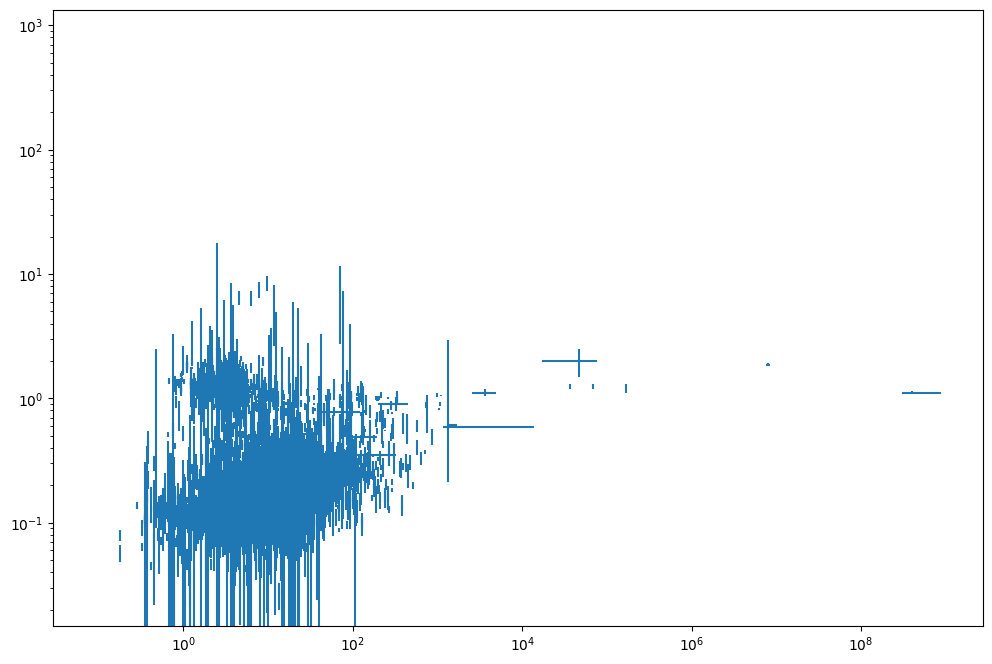

In [204]:
x = df["Orbital Period [days]"]
xerr = df[["Orbital Period Lower Unc. [days]", "Orbital Period Upper Unc. [days]"]].abs().transpose()
y = df["Planet Radius [Jupiter Radius]"]
yerr = df[["Planet Radius Lower Unc. [Jupiter Radius]", "Planet Radius Upper Unc. [Jupiter Radius]"]].abs().transpose()

ax = sns.scatterplot(data=df.iloc[:50],
                x=x,
                y=y,
                hue="Discovery Method",
                style="Discovery Method",
                s=10,
               )
ax.set(xscale="log", yscale="log")
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls="none")
plt.show()

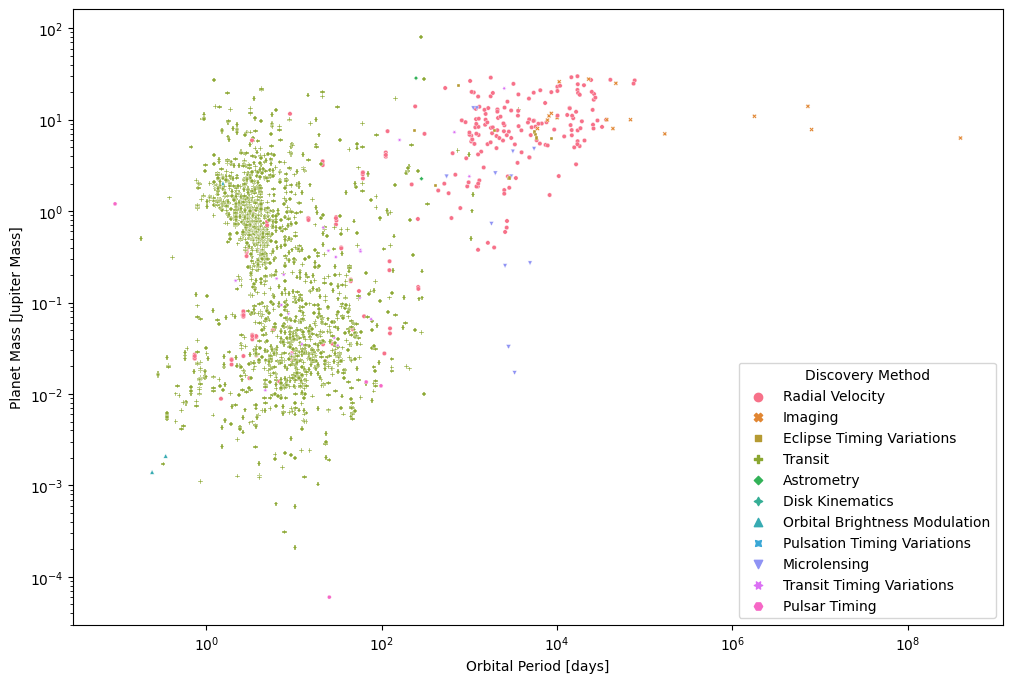

In [105]:
ax = sns.scatterplot(data=df,
                x="Orbital Period [days]",
                y="Planet Mass [Jupiter Mass]",
                hue="Discovery Method",
                style="Discovery Method",
                s=10,
               )
ax.set(xscale="log", yscale="log")
plt.show()

<AxesSubplot: xlabel='Discovery Year'>

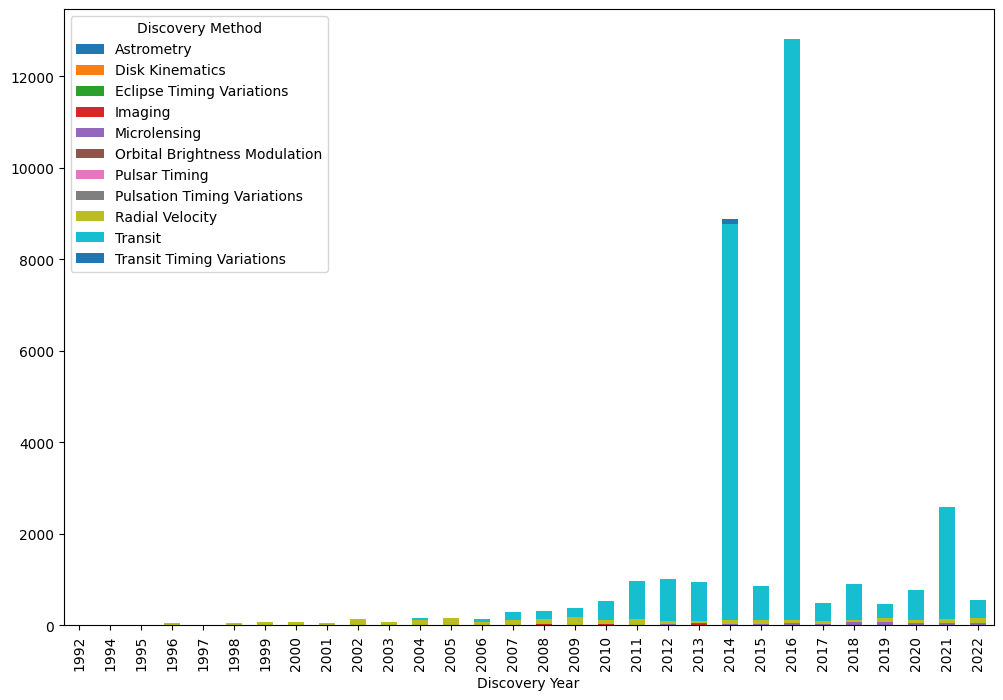

In [168]:
df.groupby(["Discovery Year", "Discovery Method"]).size().unstack().plot(kind="bar", stacked=True)